In [8]:
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import Draw
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [3]:
aromatic_drugs = [m for m in drugbank if Lipinski.NumAromaticRings(m) > 0]

In [4]:
len(aromatic_drugs)

5166

In [5]:
pattern = Chem.MolFromSmarts('c1ccccc1')

In [11]:
non_matching_drugs = [m for m in aromatic_drugs if not m.HasSubstructMatch(pattern)]

In [12]:
len(non_matching_drugs)

880

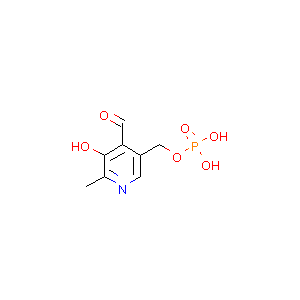

In [14]:
Draw.MolToImage(non_matching_drugs[0])

In [15]:
benzoovka = Chem.MolFromSmarts('c1ccccc1C(=O)O')

In [20]:
obsahuje_benzoovku = [m for m in aromatic_drugs if m.HasSubstructMatch(benzoovka)]

In [21]:
len(obsahuje_benzoovku)

267

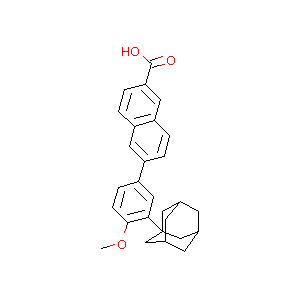

In [23]:
Draw.MolToImage(obsahuje_benzoovku[1])

In [25]:
matches = obsahuje_benzoovku[1].GetSubstructMatches(benzoovka)
matches

((27, 25, 23, 26, 28, 29, 30, 2, 1),)

In [26]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

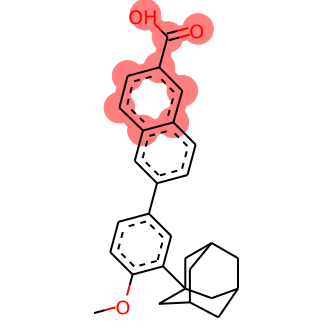

In [28]:
drawer = rdMolDraw2D.MolDraw2DSVG(333, 333)
mol = obsahuje_benzoovku[1]
drawer.DrawMolecule(mol,
                    highlightAtoms=mol.GetSubstructMatches(benzoovka)[0])
drawer.FinishDrawing()
SVG(drawer.GetDrawingText().replace('svg:',''))

In [30]:
obsahuje_vice_benzoovek = [m for m in aromatic_drugs
                           if len(m.GetSubstructMatches(benzoovka)) > 1]

In [31]:
len(obsahuje_vice_benzoovek)

22

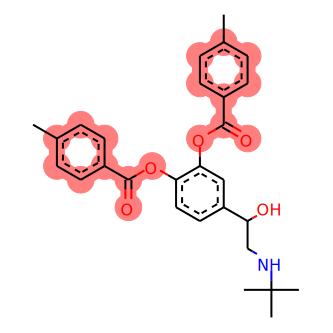

In [34]:
drawer = rdMolDraw2D.MolDraw2DSVG(333, 333)
mol = obsahuje_vice_benzoovek[0]
atoms2highlight = set()
for match in mol.GetSubstructMatches(benzoovka):
    for atom in match:
        atoms2highlight.add(atom)
drawer.DrawMolecule(mol,
                    highlightAtoms=atoms2highlight)
drawer.FinishDrawing()
SVG(drawer.GetDrawingText().replace('svg:',''))